In [202]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import  PorterStemmer
from nltk.util import ngrams
import re

In [203]:
df = pd.read_csv("../data/final.csv")
df.head()

,id,description,address,group_,lon,lat,year,month,reported,approved,checked,approved_in,district,main_cat,sub_cat
0,3470,alle Straßenlaternen um das Schnetztor defekt....,"Obere Laube 66, 78462 Konstanz, Germany",Stadtwerke Konstanz\n,9.170475,47.658698,2020,6,2020-06-06 23:48:00,2020-06-08 05:31:00,2020-06-08 05:31:00,1.2,Altstadt,Beleuchtung,Straßenlaternen defekt
1,3475,Bei Nässe spiegelglatte Stelle. Ich bin am Don...,"Hussenstraße 24, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.172454,47.659835,2020,6,2020-06-07 19:26:00,2020-06-08 05:33:00,2020-06-08 05:33:00,0.4,Altstadt,Hinweise,Hinweise
2,3476,Warnschild des Zebrastreifens zum x-ten mal um...,"Emmishofer Str. 7, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.170046,47.656598,2020,6,2020-06-08 17:08:00,2020-06-09 08:25:00,2020-06-09 08:25:00,0.6,Altstadt,"Straßen, Fahrrad & Verkehr",Schilder unkenntlich
3,3495,Bei der Fussgängerampel direkt vor dem Taschen...,"Rosgartenstraße 31, 78462 Konstanz, Germany",Tiefbauamt,9.174359,47.658116,2020,6,2020-06-13 18:23:00,2020-06-15 07:50:00,2020-06-15 07:50:00,1.6,Altstadt,"Straßen, Fahrrad & Verkehr",Ampel defekt
4,3583,"Hallo,\n\nder Spielplatz an der Kreuzlingerstr...","Kreuzlinger Str. 26, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.171569,47.657161,2020,6,2020-06-29 11:46:00,2020-06-29 14:04:00,2020-06-29 14:04:00,0.1,Altstadt,Öffentliche Orte/Ufer,Spielplätze schadhaft / verunreinigt


In [204]:
x = str(df.iloc[2,1])
result = re.search(r"[\s\S]*?(?=\(Adress)", x)[0]
result

'Warnschild des Zebrastreifens zum x-ten mal umgefahren vom Lieferanten des dortigen Geschäfts. Mindestens einmal im Monat wird dieses Schild umgefahren!\n'

In [205]:
x.iloc[0,0]


AttributeError: 'str' object has no attribute 'iloc'

In [ ]:
def func(x):
   temp = re.search(r"[\s\S]*?(?=\(Adress)", x)
   if temp is not None:
       return temp[0]
   else:
       return x
df["description"] = df.description.apply(func)

In [ ]:
text = ' '.join(df.description)


In [ ]:
def remove_punctuation(txt):
    txt = txt.lower()
    txt = "".join([i for i in txt if i not in string.punctuation])
    txt = ''.join([i for i in txt if not i.isdigit()])
    txt = txt.replace("\n"," ")
    return txt

text = remove_punctuation(text)
tokens_single = word_tokenize(text)

In [ ]:
german_stop_words = stopwords.words('german')
tokens_single = [i for i in tokens_single if i not in german_stop_words]

In [ ]:
# lemmatizer = PorterStemmer()
# tokens_single_ = []
# for word in tokens:
#     word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
#     tokens_single_.append(word)

In [209]:
tokens_single

['straßenlaternen',
 'schnetztor',
 'defektfussgängerampel',
 'laube',
 'schnetztorbodenstraße',
 'nässe',
 'spiegelglatte',
 'stelle',
 'donnerstag',
 'rad',
 'beim',
 'abbiegen',
 'hussenstrasse',
 'gestürzt',
 'boden',
 'klebriger',
 'film',
 'pollen',
 'kommen',
 'evtl',
 'klebriges',
 'ausgelaufen',
 'freitag',
 'stelle',
 'nochmals',
 'angeschaut',
 'zwischenzeit',
 'läden',
 'nähe',
 'werbeaufsteller',
 'aufgestellt',
 'wahrscheinlich',
 'einzige',
 'gestürzt',
 'sicherheitsgründen',
 'verengt',
 'warnschild',
 'zebrastreifens',
 'xten',
 'mal',
 'umgefahren',
 'lieferanten',
 'dortigen',
 'geschäfts',
 'mindestens',
 'monat',
 'schild',
 'umgefahren',
 'emmishoferstr',
 'fussgängerampel',
 'direkt',
 'taschengeschäft',
 'heitz',
 'fehlen',
 'beide',
 'sonnenschutzblenden',
 'hallo',
 'spielplatz',
 'kreuzlingerstraße',
 'lidl',
 'filiale',
 'kinder',
 'leider',
 'spielen',
 'geeignet',
 'letzte',
 'mal',
 'komplette',
 'kaputte',
 'glasflasche',
 'sandkasten',
 'ausgegraben',
 

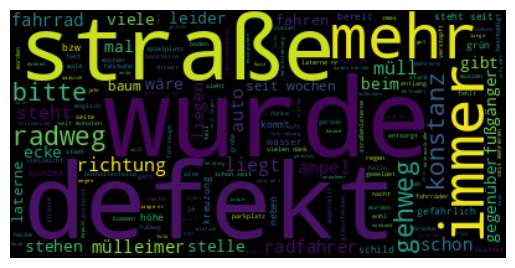

In [210]:
wordcloud = WordCloud().generate(' '.join(tokens_single))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file('../plots/wordcloud_1.png')

In [ ]:
# Creating a function to generate N-Grams
def generate_ngrams(text, WordsToCombine):
    words = text.split()
    words = [i for i in words if i not in german_stop_words]
    output = []
    for i in range(len(words)- WordsToCombine+1):
        output.append(words[i:i+WordsToCombine])
    return output

bigrams = generate_ngrams(text, WordsToCombine=2)
bigrams_con = []

for i in bigrams:
    bigrams_con.append(f"{i[0]}_{i[1]}")

joined = " ".join(bigrams_con)

In [ ]:
wordcloud = WordCloud().generate(joined)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('../plots/wordcloud_2.png')